#                           Machine Learning Churn prediction Hypothesis and Questions 

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency


In [2]:
# Importing the training data
training_data = pd.read_csv("C:/Users/hp/Documents/GitHub/Customer-Churn-ML-Prediction/Datasets/training_data.csv")

In [3]:
training_data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


## 1. Hypothesis

Null Hypothesis : There is no significant effect of the tenure period of customers and the churn rate of customers
    
Alternative Hypothesis : There is a significant effect of the tenure period of customers and the churn rate of customers

In [4]:
# Using the 'churn' and 'tenure' columns in our Data
df = training_data[['Churn', 'tenure']]

# Create a contingency table
contingency_table = pd.crosstab(df['Churn'], df['tenure'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
#print("Expected frequencies:\n", expected)

print()

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant relationship between churn and tenure.")
    print("We can reject the null hypothesis.")
else:
    print("There is no statistically significant relationship between churn and tenure.")
    print("We fail to reject the null hypothesis.")


Chi-square statistic: 774.6387018848175
P-value: 2.503475573511817e-118
Degrees of freedom: 72

There is a statistically significant relationship between churn and tenure.
We can reject the null hypothesis.


## 2. Hypothesis

Null Hypothesis : There is no significant effect of the contract type of customers and the churn rate of customers
    
Alternative Hypothesis : There is a significant effect of the contract type of customers and the churn rate of customers

In [5]:
df = training_data[['Churn', 'Contract']]

# Create a contingency table
contingency_table = pd.crosstab(df['Churn'], df['Contract'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
#print("Expected frequencies:\n", expected)

print()

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant relationship between churn and Contract.")
    print("We can reject the null hypothesis.")
else:
    print("There is no statistically significant relationship between churn and Contract.")
    print("We fail to reject the null hypothesis.")

Chi-square statistic: 882.0901975577578
P-value: 2.86119415951209e-192
Degrees of freedom: 2

There is a statistically significant relationship between churn and Contract.
We can reject the null hypothesis.


## 3. Hypothesis

Null Hypothesis : There is no significant effect of the gender of customers and the churn rate of customers
    
Alternative Hypothesis : There is a significant effect of the gender of customers and the churn rate of customers

In [6]:
# Getting the churn and gender columns
df = training_data[['Churn', 'gender']]

# Create a contingency table
contingency_table = pd.crosstab(df['Churn'], df['gender'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
#print("Expected frequencies:\n", expected)

print()

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant relationship between churn and gender.")
    print("We can reject the null hypothesis.")
else:
    print("There is no statistically significant relationship between churn and gender.")
    print("We fail to reject the null hypothesis.")

Chi-square statistic: 0.024146708104267937
P-value: 0.8765122032778316
Degrees of freedom: 1

There is no statistically significant relationship between churn and gender.
We fail to reject the null hypothesis.


### According to our result we can conclude that there is statistically significant relationship between churn and tenure then between churn and contract but none between churn and gender

## 4. Hypothesis

Null Hypothesis : There is no significant effect of being senior citizen for a company to have more churn customers

Alternative Hypothesis : There is significant effect of being senior citizen for a company to have more churn customers

In [7]:
# Getting the Senior Citizen data 
citizen = training_data.SeniorCitizen

# Replace Values
citizen = citizen.apply(lambda x: str(x).replace("No", "0"))
citizen = citizen.apply(lambda x: str(x).replace("Yes", "1"))

# Convert to integer
citizen = citizen.astype(int)

# Getting the Churn data 
churn = training_data.Churn

# Replace Values
churn = churn.apply(lambda x: str(x).replace("No", "0"))
churn = churn.apply(lambda x: str(x).replace("Yes", "1"))

# Convert to integer
churn = churn.astype(int)

# Results
print(stats.shapiro(churn))
print(stats.levene(churn, citizen))

# Two sample t-test
t_stat, p_value = stats.ttest_ind(citizen, churn)
print("T_Stat:", t_stat)
print("P_Value:", p_value)

print()

#Interpret Result
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis, P_Value is less than 0.05, so there is a significant effect")
else:
    print("Failed to reject Null Hypothesis, P_Value is greater than 0.05, so there is no significant effect")

ShapiroResult(statistic=0.5507321357727051, pvalue=0.0)
LeveneResult(statistic=160.20801906037184, pvalue=1.927831898987456e-36)
T_Stat: -12.657330645138881
P_Value: 1.927831899002827e-36

Reject Null Hypothesis, P_Value is less than 0.05, so there is a significant effect


C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### According to our result we can conclude that there is an effect on being a senior citizen customer or not for the company to lose its users. We recommend the organization to look for senior citiznes to be its users.

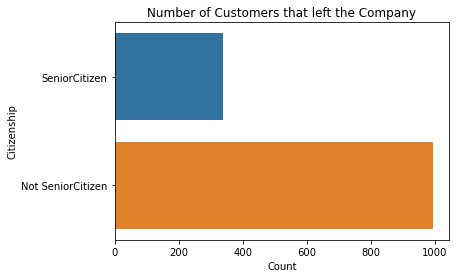

In [8]:
seniorcitizen = training_data[training_data.SeniorCitizen == "Yes"]
leave_senior = seniorcitizen[seniorcitizen.Churn == "Yes"]["Churn"].count()
not_seniorcitizen = training_data[training_data.SeniorCitizen == "No"]
not_seniorcitizen = not_seniorcitizen[not_seniorcitizen.Churn == "Yes"]["Churn"].count()
list_citizen = ["SeniorCitizen", "Not SeniorCitizen"]
list_num = [leave_senior, not_seniorcitizen]

sns.barplot(x = list_num, y= list_citizen )

# Show plot

plt.title("Number of Customers that left the Company")
plt.xlabel("Count")
plt.ylabel("Citizenship")
plt.show()

# Questions to be Answered

1. How is the gender distributed?
2. How many customers are senior citizen?
3. How many customers are using different types of services from the company?
4. How many customers churned from the company?
5. What is the Average Monthly charge?
6. What is the Average of the total charges the company gained?
7. What type of Internet service is used by customers?

### 1. How is the gender distributed?

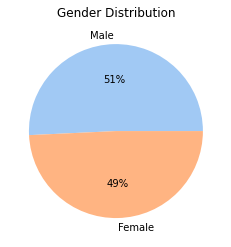

In [9]:
male = ( training_data["gender"] == "Male" ).sum()
female = ( training_data["gender"] == "Female" ).sum()

data = [male, female]
labels = ['Male', "Female"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]


#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Gender Distribution')
plt.show()

The gender distribution has no big difference, The data is balanced with gender

## 2. How many customers are senior citizen?

In [10]:
training_data.SeniorCitizen.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
training_data.SeniorCitizen.count()

5043

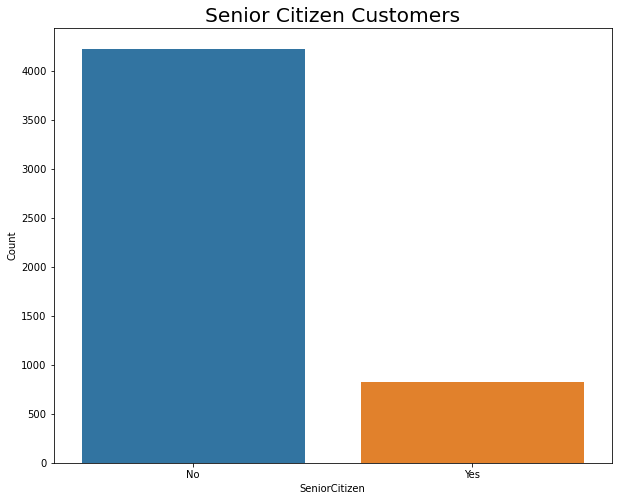

In [12]:
plt.figure(figsize=(10, 8))
sns.countplot(x="SeniorCitizen", data=training_data)

plt.style.use("fivethirtyeight")
plt.title('Senior Citizen Customers')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.show()


More than 4000 customers are not senior Citizens and 800 are seniors. This shows a high variance.

## 3. How many customers are using different types of services from the company?

In [13]:
MultipleLines = ( training_data["MultipleLines"] == "Yes" ).sum()
TechSupport = ( training_data["TechSupport"] == "Yes" ).sum()
OnlineSecurity = ( training_data["OnlineSecurity"] == "Yes" ).sum()
DeviceProtection = ( training_data["DeviceProtection"] == "Yes" ).sum()
OnlineBackup = ( training_data["OnlineBackup"] == "Yes" ).sum()
StreamingTV = ( training_data["StreamingTV"] == "Yes" ).sum()
Churn = ( training_data["Churn"] == "Yes" ).sum()

In [14]:
print("MultipleLines has",MultipleLines, "customers")
print("TechSupport has",TechSupport, "customers")
print("OnlineSecurity has",OnlineSecurity, "customers")
print("DeviceProtection has",DeviceProtection, "customers")
print("OnlineBackup has",OnlineBackup, "customers")
print("StreamingTV has",StreamingTV, "customers")
print("There are",Churn, "customers that have left the company")

MultipleLines has 2130 customers
TechSupport has 1491 customers
OnlineSecurity has 1456 customers
DeviceProtection has 1744 customers
OnlineBackup has 1732 customers
StreamingTV has 1945 customers
There are 1336 customers that have left the company


In [15]:
list_item = ["MultipleLines", "TechSupport", "OnlineSecurity", "DeviceProtection", "OnlineBackup", "StreamingTV", "Churn"]

In [16]:
list_num = [MultipleLines, TechSupport, OnlineSecurity, DeviceProtection, OnlineBackup, StreamingTV, Churn]

In [17]:
list_item

['MultipleLines',
 'TechSupport',
 'OnlineSecurity',
 'DeviceProtection',
 'OnlineBackup',
 'StreamingTV',
 'Churn']

In [18]:
training_data.StreamingTV

0        No
1        No
2        No
3        No
4        No
       ... 
5038    Yes
5039    Yes
5040     No
5041     No
5042    Yes
Name: StreamingTV, Length: 5043, dtype: object

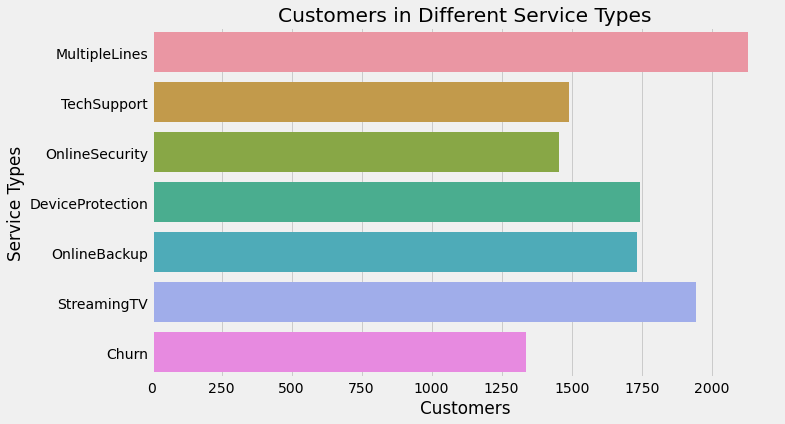

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x = list_num, y= list_item)
plt.title('Customers in Different Service Types')
plt.ylabel('Service Types')
plt.xlabel('Customers')
# Show plot
plt.show()


## 4. How many customers churned from the company?

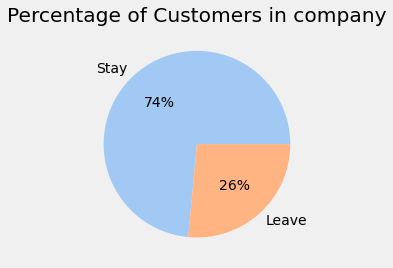

In [20]:
Leave = ( training_data["Churn"] == "Yes" ).sum()
Stay = ( training_data["Churn"] == "No" ).sum()

data = [Stay, Leave]
labels = ['Stay', "Leave"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Percentage of Customers in company")
plt.show()

The company's data shows that 75% of customers are leaving. More than 50% of them have no internet service, techsupport and other benefits from the organization

## 5. What is the Average Monthly charge?

In [21]:
mean  = training_data["MonthlyCharges"].mean()
print("Averge monthly charge is : ", round(mean,2))

Averge monthly charge is :  65.09


## 6. What is the Average of the total charges the company gained?

In [22]:
training_data.TotalCharges =  training_data.TotalCharges.astype(float)

In [23]:
total  = training_data["TotalCharges"].mean()
print("Averge Total charge is : ", round(total,2))

Averge Total charge is :  21254.45


## 7. What type of Internet service is used by customers?

In [24]:
training_data.InternetService

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
5038            DSL
5039    Fiber optic
5040            DSL
5041    Fiber optic
5042    Fiber optic
Name: InternetService, Length: 5043, dtype: object

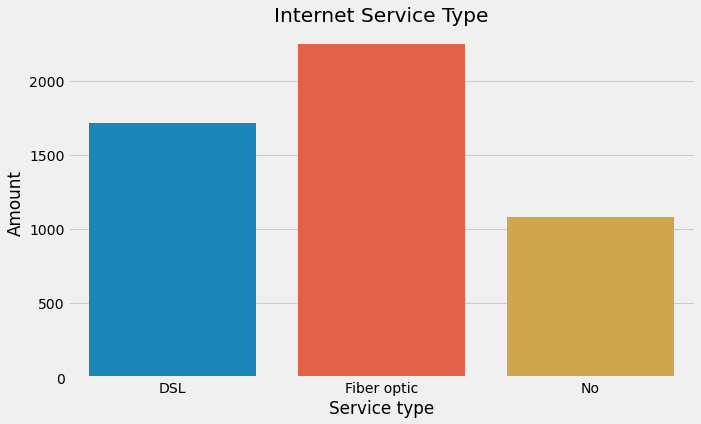

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x="InternetService", data=training_data)

plt.style.use("fivethirtyeight")

plt.title("Internet Service Type")
plt.xlabel("Service type")
plt.ylabel("Amount")
plt.show()